# Calling CPP Fortran Module from Python

We use f2py to pre-compile our fortran cpp module (available at https://github.com/CEDIA-models/cpp). We can then use the module (all its functions and global variables) interactively from Python. Here is an example. 

In [35]:
from cpp import cpp

Now load the parameters from cpp

In [36]:
cpp.loadcpp();

Now let's create an individual age 60 who is considering retiring. 

In [37]:
import numpy as np
byear = 1958;
year = 2018;
age = 60;

Now let's setup is earnings history. The regime is in place since 1966. Let's assume this retiree has contributed the maximum in each year between 1968 and 2010 (1968 is the year he turned 18). 

In [38]:
beg = byear+18-1966+1;
end = 2018-1966+1;

earn = cpp.ympe[beg:end];
earn


array([ 9300.  , 10400.  , 11700.  , 13100.  , 14700.  , 16500.  ,
       18500.  , 20800.  , 23400.  , 25800.  , 25900.  , 26500.  ,
       27700.  , 28900.  , 30500.  , 32200.  , 33400.  , 34400.  ,
       34900.  , 35400.  , 35800.  , 36900.  , 37400.  , 37600.  ,
       38300.  , 39100.  , 39900.  , 40500.  , 41100.  , 42100.  ,
       43700.  , 44900.  , 46300.  , 47200.  , 48300.  , 50100.  ,
       51100.  , 52500.  , 53600.  , 54136.  , 54677.36, 55224.13])

We then call the ape function from cpp to compute his ape

In [39]:
ape = cpp.aape(byear,year,age,earn,True);
ape

63503.84730751705

Now with the ape, we can compute the benefit he would obtain if he claimed at age 60

In [40]:
ben = cpp.ben(ape,age,byear)/12
ben


846.7179641002273

The number found at https://www.rrq.gouv.qc.ca/fr/programmes/regime_rentes/rente_retraite/Pages/montant_rr.aspx is 725.87$ which is very close. We can also investigate what happens if he was to claim at a different age, assuming he does not work and therefore does not contribute more: 

In [41]:
benp = np.zeros((10,1));
ages = [60, 61, 62, 63, 64, 65, 66, 67 , 68, 69];
i = 0
for a in ages:
    benp[i] = cpp.ben(ape,a,byear)/12;
    i +=1
benp/benp[5]

array([[0.64 ],
       [0.712],
       [0.784],
       [0.856],
       [0.928],
       [1.   ],
       [1.084],
       [1.168],
       [1.252],
       [1.336]])

We get slightly different numbers from the early claiming, but are spot on for late claiming (in terms of adjustment). To be investigated. 

Finally, we can decide to increate the delayed retirement credit (after age 65) to check what happens. We need to modify the drc (here we change it for all cohorts)

In [42]:
cpp.drc[:] = cpp.drc[:]*0.5;

In [43]:
benm = np.zeros((10,1));
i = 0
for a in ages:
    benm[i] = cpp.ben(ape,a,byear)/12;
    i +=1
benm/benm[5]

array([[0.64 ],
       [0.712],
       [0.784],
       [0.856],
       [0.928],
       [1.   ],
       [1.042],
       [1.084],
       [1.126],
       [1.168]])

We can finally plot those. 

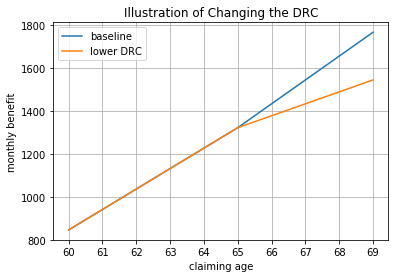

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(ages,benp)
ax.plot(ages,benm)
ax.set(xlabel='claiming age',ylabel='monthly benefit',title='Illustration of Changing the DRC',xticks=ages)
ax.legend(['baseline','lower DRC'])
ax.grid()
plt.show()